In [1]:
#data collection.
#data preprocessing and cleaning.
#feature selection.
#model implementation.
#training and testing.
#evaluation.
import numpy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas
import seaborn as sns


from matplotlib import pyplot as plt 
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix


In [2]:

df = pd.read_csv(r'C:\Users\MrLaptop\Desktop\nsll.csv',encoding="utf-8")

In [3]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [4]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [5]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins'
            ,'logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells'
,'num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate'
            ,'rerror_rate','srv_rerror_rate'
,'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate'
            ,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
,'attack_features'])

df.columns = columns
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_features
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
object_features = df.select_dtypes(include=['object'])
object_cols = object_features.columns
numeric_features = df.select_dtypes(include=['int64', 'float64'])
numeric_col = numeric_features.columns
print('Number of Numeric Features: ', len(numeric_col))
print('Number of Object Features: ', len(object_cols))

Number of Numeric Features:  38
Number of Object Features:  4


In [7]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [8]:
# map normal to 0, all attacks to 1
data_attack = df.attack_features.map(lambda a: 0 if a == 'normal' else 1)
#test_attack = test_df.attack_features.map(lambda a: 0 if a == 'normal' else 1)


#data_with_attack = df.join(data_attack)
df['Target'] = data_attack
#test_df['label'] = test_attack

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_features,Target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0


In [9]:
df['Target'].head()

0    0
1    0
2    1
3    0
4    0
Name: Target, dtype: int64

In [10]:
df['Target'].value_counts()

Target
0    67343
1    58630
Name: count, dtype: int64

In [11]:
attack_vs_features = pd.crosstab(df.attack_features, df.Target)
attack_vs_features

Target,0,1
attack_features,,
back,0,956
buffer_overflow,0,30
ftp_write,0,8
guess_passwd,0,53
imap,0,11
ipsweep,0,3599
land,0,18
loadmodule,0,9
multihop,0,7


In [12]:
df.drop_duplicates(keep=False,inplace=True)

In [13]:
df.duplicated().any()

False

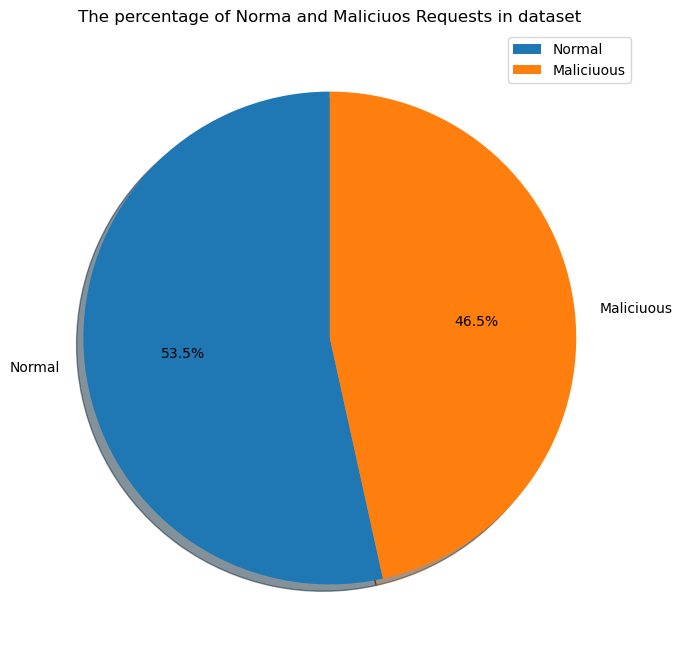

In [14]:
labels = ["Normal",'Maliciuous']
sizes = [dict(df.Target.value_counts())[0], dict(df.Target.value_counts())[1]]
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["Normal", "Maliciuous"])
plt.title('The percentage of Norma and Maliciuos Requests in dataset')
plt.show()

In [15]:
print(df["protocol_type"].value_counts())
print(df["service"].value_counts())
print(df["flag"].value_counts())

protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64
flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64


In [16]:
LEnc = LabelEncoder()
df['protocol_type'] = LEnc.fit_transform(df['protocol_type'])
df['service'] = LEnc.fit_transform(df['service'])
df['flag'] = LEnc.fit_transform(df['flag'])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_features,Target
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1
125969,8,2,49,9,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,0
125970,0,1,54,9,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,0
125971,0,1,30,5,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1


In [17]:
df['protocol_type']

0         1
1         2
2         1
3         1
4         1
         ..
125968    1
125969    2
125970    1
125971    1
125972    1
Name: protocol_type, Length: 125973, dtype: int32

In [18]:
df['flag']

0         9
1         9
2         5
3         9
4         9
         ..
125968    5
125969    9
125970    9
125971    5
125972    9
Name: flag, Length: 125973, dtype: int32

In [19]:
df['service']

0         20
1         44
2         49
3         24
4         24
          ..
125968    49
125969    49
125970    54
125971    30
125972    20
Name: service, Length: 125973, dtype: int32

In [20]:
x = df.drop(['Target','attack_features'], axis=1)
y = df['Target'].copy()
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.25, random_state=42)

Normalize = StandardScaler()
x_train = Normalize.fit_transform(x_train)
x_test = Normalize.fit_transform(x_test)

In [21]:
x_train.shape

(94479, 41)

In [22]:
y_train.shape

(94479,)

In [23]:
x_test.shape

(31494, 41)

In [24]:
y_test.shape

(31494,)

Logistic Regression

In [25]:
logr = linear_model.LogisticRegression(max_iter=1500)
logr.fit(x_train,y_train)

logr.score(x_train,y_train)

0.9542226314842451

In [26]:
predictions = logr.predict(x_test)

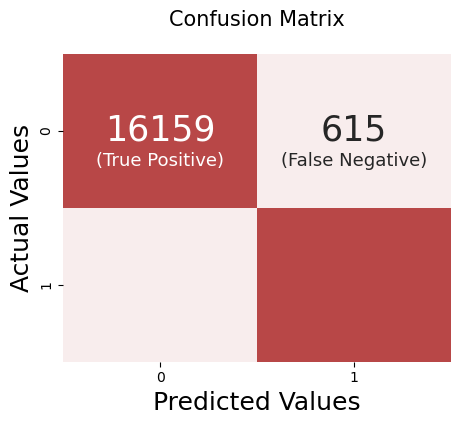

In [27]:
cm =confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 25},
            cmap=sns.color_palette(['#f8eded', '#b84747'], as_cmap=True), cbar=False,
            yticklabels=['0', '1'], xticklabels=['0', '1'], ax=ax)

ax.set_title('Confusion Matrix', size=15, pad=20)
ax.set_xlabel('Predicted Values', size=18)
ax.set_ylabel('Actual Values', size=18)

additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
for text_elt, additional_text in zip(ax.texts, additional_texts):
    ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(),
            ha='center', va='top', size=13)

In [32]:
Accuracy2 = metrics.accuracy_score(y_test, predictions)
Accuracy2

0.9537054677081349

In [33]:
Precision2 = metrics.precision_score(y_test, predictions)
Precision2

0.9576259489302967

In [34]:
Sensitivity_recall2 = metrics.recall_score(y_test, predictions)
Sensitivity_recall2

0.9426630434782609

In [35]:
Specificity2 = metrics.recall_score(y_test, predictions, pos_label=0)
Specificity2

0.9633957314892095

In [36]:
F1_score2 = metrics.f1_score(y_test, predictions)
F1_score2

0.950085587127696

DecisionTreeClassifier

In [37]:
dtree = DecisionTreeClassifier(ccp_alpha=0.0001)
dtree.fit(x_train,y_train)

predictions1 = dtree.predict(x_test)

0.9968670286518697

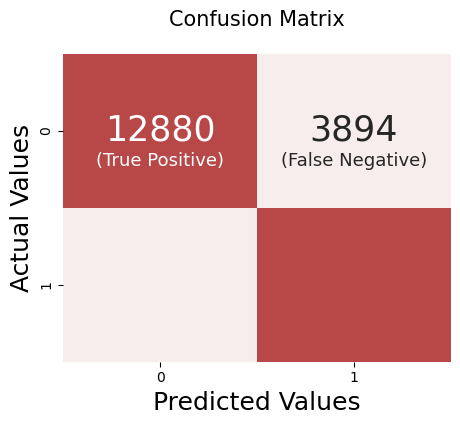

In [39]:
cm =confusion_matrix(y_test, predictions1)
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 25},
            cmap=sns.color_palette(['#f8eded', '#b84747'], as_cmap=True), cbar=False,
            yticklabels=['0', '1'], xticklabels=['0', '1'], ax=ax)

ax.set_title('Confusion Matrix', size=15, pad=20)
ax.set_xlabel('Predicted Values', size=18)
ax.set_ylabel('Actual Values', size=18)

additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
for text_elt, additional_text in zip(ax.texts, additional_texts):
    ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(),
            ha='center', va='top', size=13)
    
dtree.score(x_train,y_train)

In [40]:
Accuracy = metrics.accuracy_score(y_test, predictions1)
Accuracy

0.855782053724519

In [41]:
Precision1 = metrics.precision_score(y_test, predictions1)
Precision1

0.7832572637203606

In [42]:
Sensitivity_recall1 = metrics.recall_score(y_test, predictions1)
Sensitivity_recall1

0.9559782608695652

In [43]:
Specificity1 = metrics.recall_score(y_test, predictions1, pos_label=0)
Specificity1 

0.7678550137116966

In [44]:
F1_score1 = metrics.f1_score(y_test, predictions1)
F1_score1

0.8610414244630729

KNeighborsClassifier

In [45]:
myList= list(range(1,25))
neighbours= list(filter(lambda x: x % 2 != 0, myList))

In [46]:
ac_scores =[]
for k in neighbours:
    kcl = KNeighborsClassifier(n_neighbors=k)
    kcl.fit(x_train,y_train) 
    ypred = kcl.predict(x_test)
    scores= accuracy_score(y_test, ypred)
    ac_scores.append(scores)
MSE = [1 - x for x in ac_scores]
optimal_K = neighbours[MSE.index(min(MSE))]
print ("the optimal k is %d" % optimal_K )

the optimal k is 1


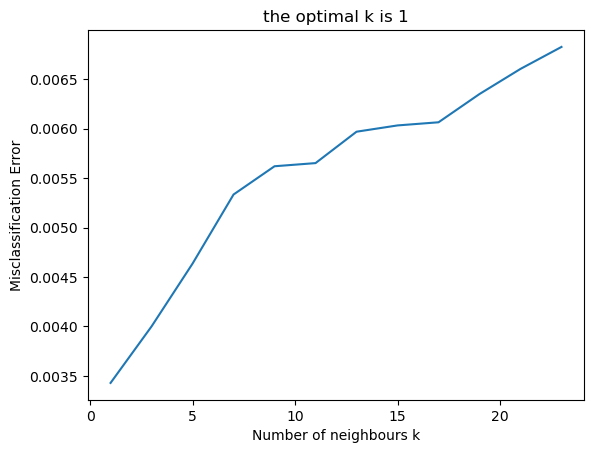

In [47]:
plt.plot(neighbours,MSE)
plt.xlabel("Number of neighbours k")
plt.ylabel("Misclassification Error")
plt.title("the optimal k is %d" % optimal_K)
plt.show()

In [48]:
ac_scores

[0.9965707753857878,
 0.9959992379500857,
 0.9953641963548613,
 0.9946656506001144,
 0.9943798818822633,
 0.9943481298025021,
 0.9940306090048898,
 0.9939671048453673,
 0.9939353527656062,
 0.9936495840477552,
 0.9933955674096653,
 0.9931733028513368]

In [49]:
kcl = KNeighborsClassifier(n_neighbors=10)
kcl.fit(x_train,y_train)
ypred = kcl.predict(x_test)

0.9958615141989225

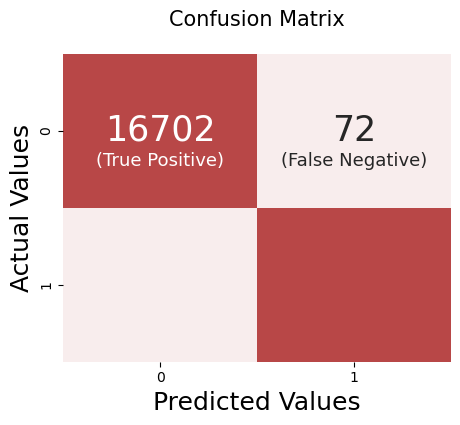

In [50]:
cm =confusion_matrix(y_test, ypred)
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 25},
            cmap=sns.color_palette(['#f8eded', '#b84747'], as_cmap=True), cbar=False,
            yticklabels=['0', '1'], xticklabels=['0', '1'], ax=ax)

ax.set_title('Confusion Matrix', size=15, pad=20)
ax.set_xlabel('Predicted Values', size=18)
ax.set_ylabel('Actual Values', size=18)

additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
for text_elt, additional_text in zip(ax.texts, additional_texts):
    ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(),
            ha='center', va='top', size=13)
    
kcl.score(x_train,y_train)    

In [51]:
Accuracy = metrics.accuracy_score(y_test, ypred)
Accuracy

0.9944433860417857

In [52]:
Precision = metrics.precision_score(y_test, ypred)
Precision

0.9950983729321261

In [53]:
Sensitivity_recall = metrics.recall_score(y_test, ypred)
Sensitivity_recall

0.9930027173913043

In [54]:
Specificity = metrics.recall_score(y_test, ypred, pos_label=0)
Specificity

0.9957076427804936

In [55]:
F1_score = metrics.f1_score(y_test, ypred)
F1_score

0.9940494406474208